In [88]:
import pandas as pd
import geopandas as gpd
import numpy as np
import censusdata
import matplotlib.pyplot as plt

# Import the data

copy paste the url up to but not including the .json to visit the website with information about the dataset

the `?$limit` at the end of url signifies the number of rows to pull

In [89]:
crime_df = pd.read_json("https://data.cityofchicago.org/resource/crimes.json?$limit=50000")
housing_df = pd.read_json(
    "https://datacatalog.cookcountyil.gov/resource/8f9d-wy2d.json?$limit=50000"
)
tract_boundaries = gpd.read_file('b.geojson')


## Add census tract to the Crimes Dataset

crs is the coordinate system and EPSG:4326 is just earths longitude and latitude

gps.sjoin() joins the data sets where each row in the first df is within the 'shape' of the second df

In [90]:
crime_gdf = gpd.GeoDataFrame(
    crime_df,
    crs="EPSG:4326",
    geometry=gpd.points_from_xy(crime_df.longitude, crime_df.latitude),
)
crime_gdf = gpd.sjoin(crime_gdf, tract_boundaries, how="left", predicate="within")

# Data Cleaning

In [94]:
housing_df["geoid"] = housing_df["geo_geoid"].astype(str)[:-4]
crime_gdf["geoid"] = crime_gdf["geoid10"]

# print((crime_gdf['geoid10'].unique()))
# print((housing_df['geoid'].unique()))

# df = pd.DataFrame()
# df['geoid10'] = crime_gdf['geoid10'].unique()
# df["crime"] = crime_gdf.groupby("geoid10").size().values

# df["housing"] = housing_df.groupby("geoid").mean()
# # df['geoid'] = (crime_gdf["geoid10"].unique()+housing_df["geoid"].unique()).unique()
# # df['crime'] = crime_gdf.groupby('geoid10').size().values
crime_counts = crime_gdf["geoid"].value_counts().rename_axis("geoid").reset_index(name="crime_counts")
# print(crime_gdf.groupby('geoid', as_index=False)['geoid'].count())
avg_house_sale = housing_df.groupby("geoid", as_index=False)["meta_sale_price"].mean()

df = pd.merge(avg_house_sale, crime_counts, on="geoid", how="left")
print(df)



           geoid  meta_sale_price  crime_counts
0    17031010100    251400.301887         107.0
1    17031010201    232398.200000          87.0
2    17031010202    194247.500000         136.0
3    17031010300    225240.279720          93.0
4    17031010400    327220.535714          68.0
..           ...              ...           ...
788  17031843500    101612.000000          41.0
789  17031843600    314150.910714          89.0
790  17031843700    588530.662338          45.0
791  17031843800    146902.216216          47.0
792  17031843900     95928.145833         137.0

[793 rows x 3 columns]


# PLOT

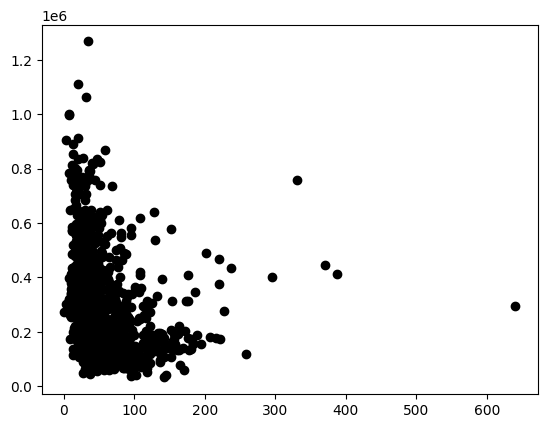

In [95]:
plt.plot(df['crime_counts'], df['meta_sale_price'], 'o', color='black')
plt.show()